## <center> ZOMATO RESTAURANT SUCCESS FACTORS ANALYSIS

In [1]:
## Importing the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
## Importing the file.

In [2]:
df=pd.read_csv('C:/Users/Mayank Parashari/Downloads/Indian-Resturants.csv')

In [1]:
## Getting the view of the data.

In [3]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
## For analyzing the data types of the different coluumns.¶

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
## Describing the 5 point summary of the data.

In [5]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [2]:
## Describing summary statistics for all columns.

In [6]:
df.describe(include='object')

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211810,211944,211944,48757,211944,210553,208070,211944,211944,211944
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,299,11630,3660,7100,1760,15996,26605,211944,3352,65451


In [7]:
## Dexcribing the shape of the dataset.

In [7]:
df.shape

(211944, 26)

In [8]:
## Value count of the data.

In [8]:
df['res_id'].value_counts()[df['res_id'].value_counts() > 1]

res_id
18631911    169
68976       161
18598737    156
72245       154
18921640    154
           ... 
3100179       2
2700801       2
19116862      2
2701455       2
310816        2
Name: count, Length: 30304, dtype: int64

In [9]:
## Dropping the duplicate value from the data.

In [9]:
df = df.drop_duplicates(subset='res_id')

In [10]:
duplicates = df.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicates)


Total Duplicate Rows: 0


In [11]:
df.shape

(55568, 26)

In [12]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [13]:
## Replacing the missing values of the zipcode with most common zipcode in a particular city.
df['zipcode'] = df.groupby('city')['zipcode'].transform(
                    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
                )

In [14]:
## Checking for unique values in different columns.
for col in ['city','locality','establishment','rating_text']:
    print(col, df[col].nunique())
    print(df[col].value_counts().head(), '\n')


city 99
city
Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Name: count, dtype: int64 

locality 3731
locality
Civil Lines      752
Model Town       447
Shastri Nagar    392
Vijay Nagar      380
Gomti Nagar      274
Name: count, dtype: int64 

establishment 27
establishment
['Quick Bites']        14032
['Casual Dining']      12270
['Café']                4123
['Bakery']              3741
['Dessert Parlour']     3675
Name: count, dtype: int64 

rating_text 33
rating_text
Average      16313
Good         16019
Very Good    10905
Not rated    10058
Excellent     1609
Name: count, dtype: int64 



In [15]:
## Managing the missing time values.
df['timings'] = df.groupby('locality')['timings'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
)

In [16]:
df.isnull().sum()

res_id                    0
name                      0
establishment             0
url                       0
address                  18
city                      0
city_id                   0
locality                  0
latitude                  0
longitude                 0
zipcode                 395
country_id                0
locality_verbose          0
cuisines                470
timings                   5
average_cost_for_two      0
price_range               0
currency                  0
highlights                0
aggregate_rating          0
rating_text               0
votes                     0
photo_count               0
opentable_support        12
delivery                  0
takeaway                  0
dtype: int64

In [17]:
## Average rating of the restaurants.
avg_rating = df['aggregate_rating'].mean()
print("Average Rating:", avg_rating)

Average Rating: 2.958593075151166


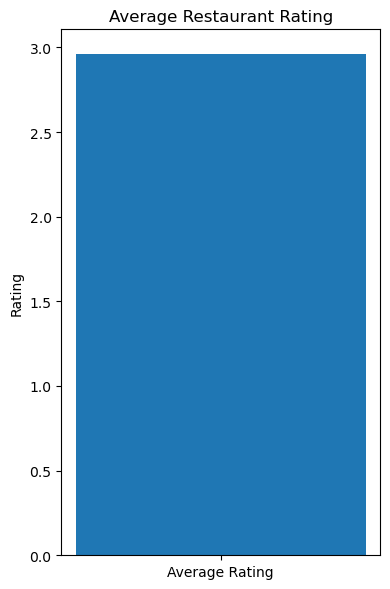

In [18]:
plt.figure(figsize=(4,6))
plt.bar(['Average Rating'], [avg_rating])
plt.ylabel('Rating')
plt.title('Average Restaurant Rating')
plt.tight_layout()
plt.show()

In [19]:
print(df['aggregate_rating'].describe())

count    55568.000000
mean         2.958593
std          1.464576
min          0.000000
25%          2.900000
50%          3.500000
75%          3.900000
max          4.900000
Name: aggregate_rating, dtype: float64


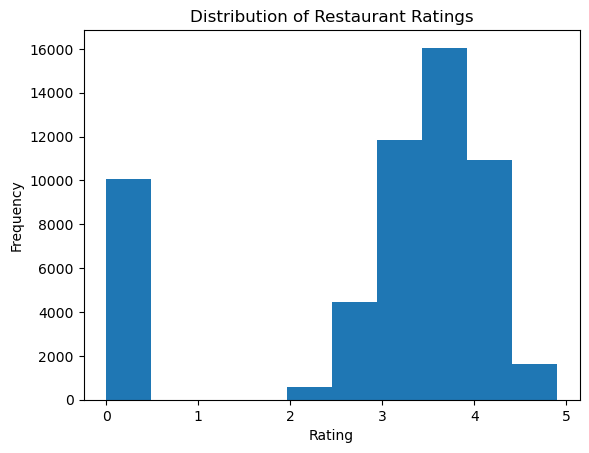

In [20]:
plt.hist(df['aggregate_rating'].dropna(), bins=10)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Ratings")
plt.show()

Insights:
Most common rating of the restaurents is between 3 and 4.

In [21]:
city_counts = df['city'].value_counts()

In [22]:
city_counts.head(5)

city
Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Name: count, dtype: int64

In [23]:
df_clean = df.dropna(subset=['aggregate_rating', 'city'])

In [24]:
grouped = df_clean.groupby('city')['aggregate_rating']
data = [grouped.get_group(city) for city in grouped.groups.keys()]
labels = list(grouped.groups.keys())

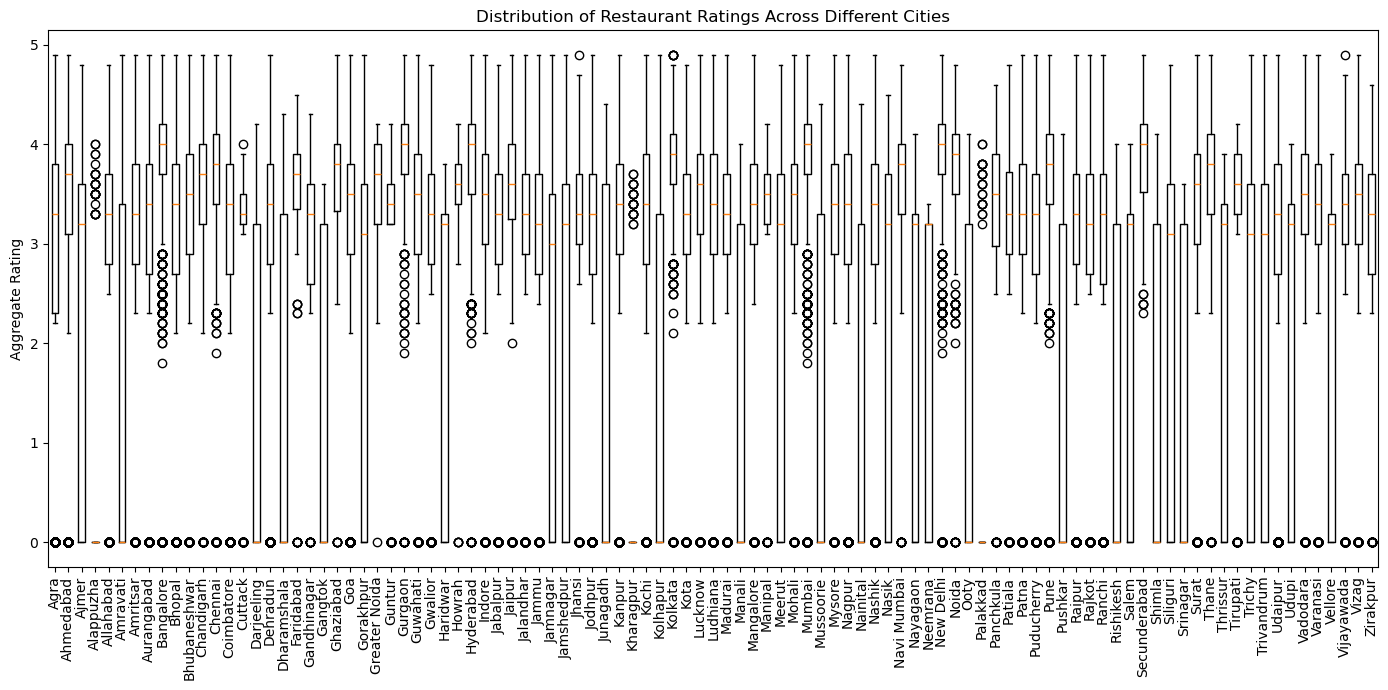

In [25]:
plt.figure(figsize=(14, 7))
plt.boxplot(data, labels=labels)
plt.xticks(rotation=90)
plt.ylabel("Aggregate Rating")
plt.title("Distribution of Restaurant Ratings Across Different Cities")
plt.tight_layout()
plt.show()

In [28]:
# Ensure the cuisines column exists
df = df.dropna(subset=['cuisines'])

# Split cuisines (many restaurants list multiple cuisines separated by commas)
cuisine_series = df['cuisines'].str.split(', ')

# Flatten list of cuisines into a single series
all_cuisines = cuisine_series.explode()

# Count frequency of each cuisine
cuisine_counts = all_cuisines.value_counts()

# Display top cuisines
print("Top 20 Most Popular Cuisines:")
print(cuisine_counts.head(20))

Top 20 Most Popular Cuisines:
cuisines
North Indian    19226
Chinese         12724
Fast Food       11988
Desserts         7064
Beverages        6754
South Indian     6381
Continental      5076
Bakery           4813
Cafe             4252
Street Food      3715
Italian          3673
Biryani          3207
Mithai           3144
Ice Cream        3053
Pizza            2461
Mughlai          2034
Burger           1852
Sandwich         1524
Finger Food      1336
Juices           1143
Name: count, dtype: int64


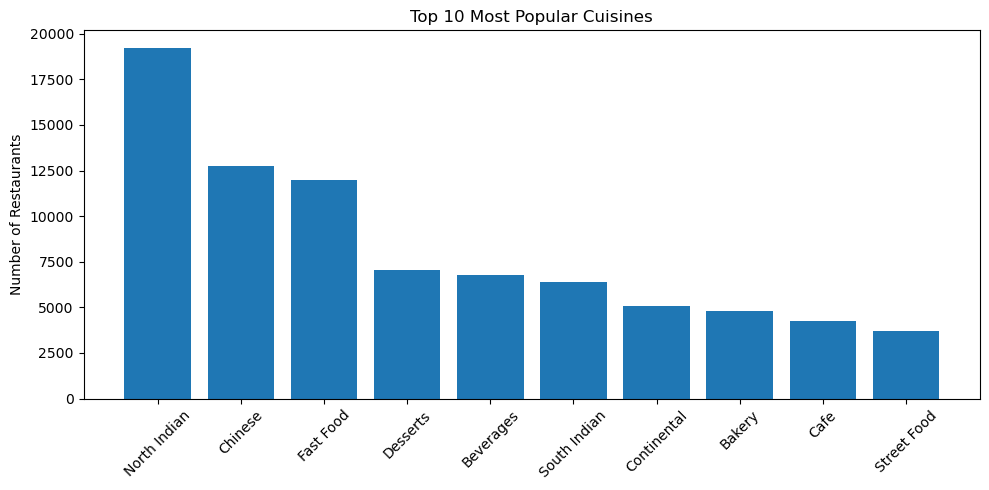

In [29]:
top10_cuisines = cuisine_counts.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10_cuisines.index, top10_cuisines.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Most Popular Cuisines")
plt.tight_layout()
plt.show()

In [10]:
## Most popular cousine is North Indian.

In [30]:
# Keep only rows with both fields present
df_clean1 = df.dropna(subset=['price_range', 'aggregate_rating'])

# Compute correlation
correlation = df_clean1['price_range'].corr(df_clean1['aggregate_rating'])
print("Correlation between price range and ratings:", correlation)

Correlation between price range and ratings: 0.2464027186565711


<Figure size 800x500 with 0 Axes>

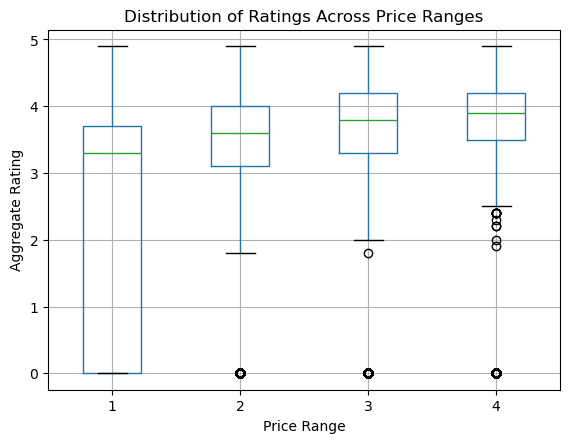

In [31]:
plt.figure(figsize=(8, 5))
df_clean.boxplot(column='aggregate_rating', by='price_range')
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Distribution of Ratings Across Price Ranges")
plt.suptitle("")  # removes default pandas title
plt.show()


price_range
1    2.604473
2    3.218448
3    3.496459
4    3.649107
Name: aggregate_rating, dtype: float64


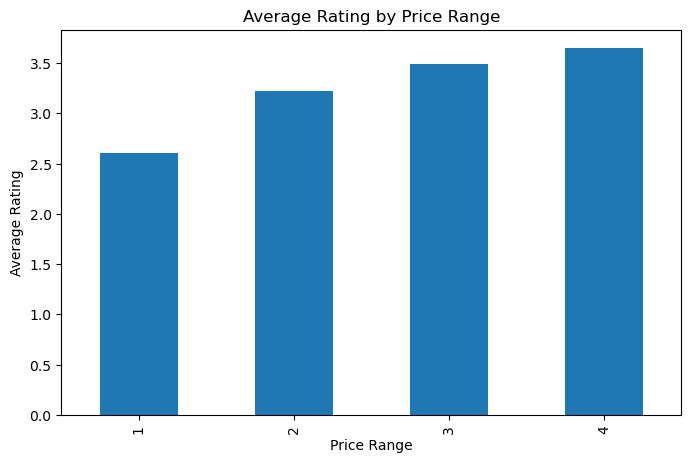

In [32]:
mean_ratings = df_clean.groupby('price_range')['aggregate_rating'].mean()
print(mean_ratings)

mean_ratings.plot(kind='bar', figsize=(8,5))
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()

In [33]:
# Keep required columns only
df_clean = df.dropna(subset=['delivery', 'aggregate_rating'])

# Average rating by online order availability
avg_ratings = df_clean.groupby('delivery')['aggregate_rating'].mean()

print("Average ratings by online order availability:")
print(avg_ratings)

Average ratings by online order availability:
delivery
-1    2.739719
 0    2.833866
 1    3.476571
Name: aggregate_rating, dtype: float64


<Figure size 800x500 with 0 Axes>

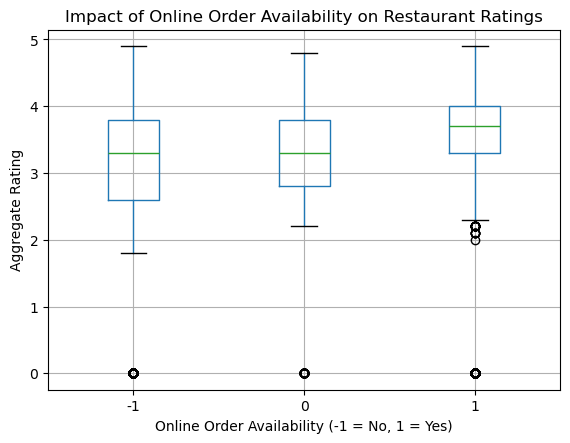

In [34]:
plt.figure(figsize=(8, 5))
df_clean.boxplot(
    column='aggregate_rating',
    by='delivery'
)
plt.xlabel("Online Order Availability (-1 = No, 1 = Yes)")
plt.ylabel("Aggregate Rating")
plt.title("Impact of Online Order Availability on Restaurant Ratings")
plt.suptitle("")
plt.show()

In [35]:
# Remove missing cuisine values
df = df.dropna(subset=['cuisines'])

# Split multiple cuisines into individual entries
df['cuisines'] = df['cuisines'].str.split(', ')

# Flatten the list of cuisines
all_cuisines = df.explode('cuisines')

# Count cuisine frequency
popular_cuisines = all_cuisines['cuisines'].value_counts()

# Display top 10 cuisines
print("Top 10 Most Popular Cuisines:")
print(popular_cuisines.head(10))

Top 10 Most Popular Cuisines:
cuisines
North Indian    19226
Chinese         12724
Fast Food       11988
Desserts         7064
Beverages        6754
South Indian     6381
Continental      5076
Bakery           4813
Cafe             4252
Street Food      3715
Name: count, dtype: int64


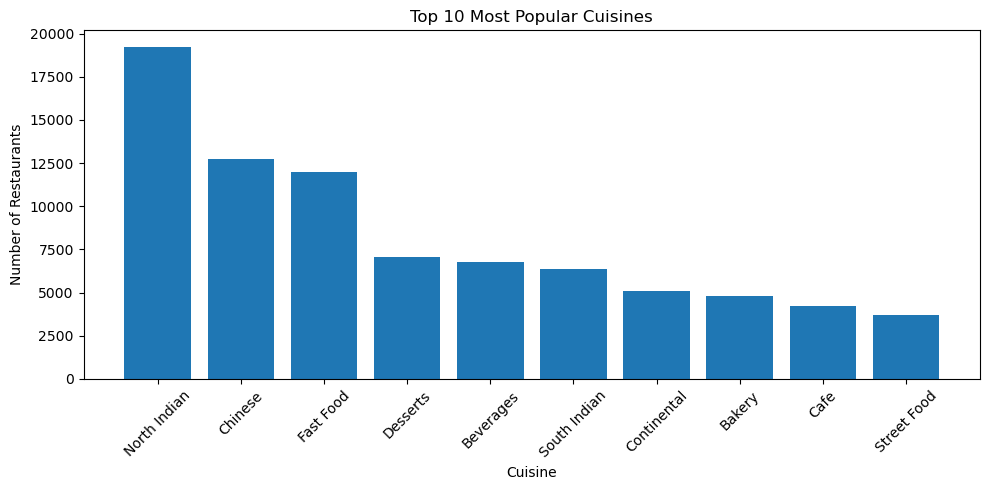

In [33]:
top10 = popular_cuisines.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Most Popular Cuisines")
plt.tight_layout()
plt.show()

In [36]:
# Drop missing values
df_clean = df.dropna(subset=['cuisines', 'aggregate_rating'])

# Count number of cuisines (list length)
df_clean['cuisine_count'] = df_clean['cuisines'].apply(len)

# Correlation
correlation = df_clean['cuisine_count'].corr(df_clean['aggregate_rating'])
print("Correlation between cuisine variety and ratings:", correlation)


Correlation between cuisine variety and ratings: 0.2491363607346406


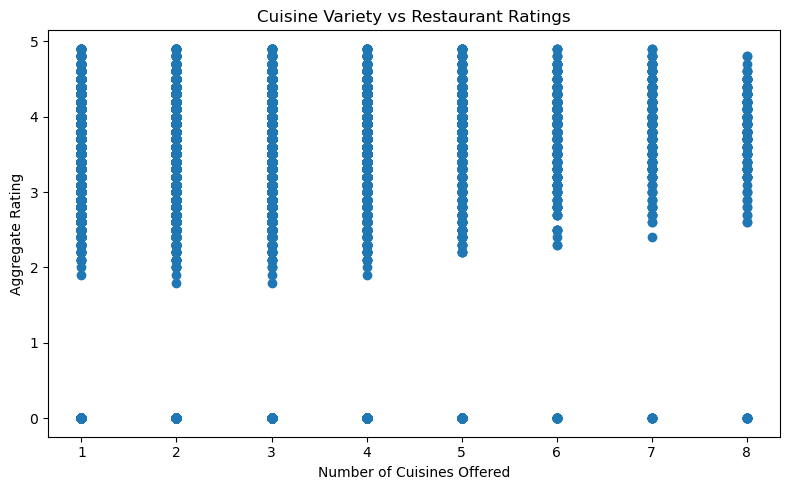

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['cuisine_count'], df_clean['aggregate_rating'])
plt.xlabel("Number of Cuisines Offered")
plt.ylabel("Aggregate Rating")
plt.title("Cuisine Variety vs Restaurant Ratings")
plt.tight_layout()
plt.show()

Insights:
Average Rating increases when number of cousines offered is increased. 

In [39]:
# Remove missing values
df_clean = df.dropna(subset=['price_range', 'aggregate_rating'])

# View basic statistics
print(df_clean[['price_range', 'aggregate_rating']].describe())

        price_range  aggregate_rating
count  55098.000000      55098.000000
mean       1.719591          2.979478
std        0.879407          1.449025
min        1.000000          0.000000
25%        1.000000          2.900000
50%        1.000000          3.500000
75%        2.000000          3.900000
max        4.000000          4.900000


In [40]:
avg_rating_by_price = (
    df_clean
    .groupby('price_range')['aggregate_rating']
    .mean()
)

print("Average Rating by Price Range:")
print(avg_rating_by_price)

Average Rating by Price Range:
price_range
1    2.636904
2    3.223433
3    3.498180
4    3.650698
Name: aggregate_rating, dtype: float64


<Figure size 800x500 with 0 Axes>

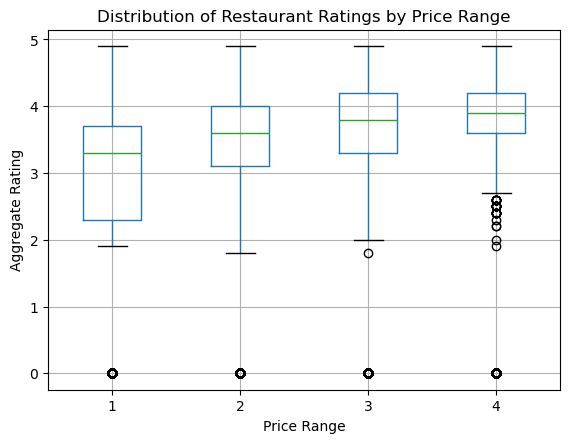

In [41]:
plt.figure(figsize=(8,5))
df_clean.boxplot(column='aggregate_rating', by='price_range')
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Distribution of Restaurant Ratings by Price Range")
plt.suptitle("")
plt.show()

In [42]:
correlation = df_clean['price_range'].corr(df_clean['aggregate_rating'])
print("Correlation between price range and ratings:", correlation)

Correlation between price range and ratings: 0.2464027186565711


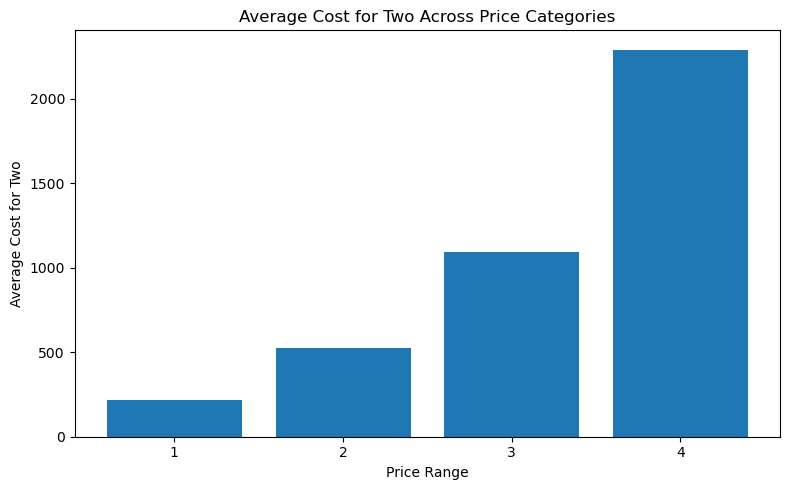

In [43]:
# Remove missing values
df_clean = df.dropna(subset=['price_range', 'average_cost_for_two'])

# Calculate average cost for two per price range
avg_cost = df_clean.groupby('price_range')['average_cost_for_two'].mean()

# Plot
plt.figure(figsize=(8,5))
plt.bar(avg_cost.index.astype(str), avg_cost.values)
plt.xlabel("Price Range")
plt.ylabel("Average Cost for Two")
plt.title("Average Cost for Two Across Price Categories")
plt.tight_layout()
plt.show()

In [44]:
# Remove missing values
df_clean = df.dropna(subset=['delivery', 'aggregate_rating'])

# Average ratings by online order availability
avg_ratings = df_clean.groupby('delivery')['aggregate_rating'].mean()

print("Average ratings:")
print(avg_ratings)

Average ratings:
delivery
-1    2.739719
 0    2.833866
 1    3.476571
Name: aggregate_rating, dtype: float64


<Figure size 800x500 with 0 Axes>

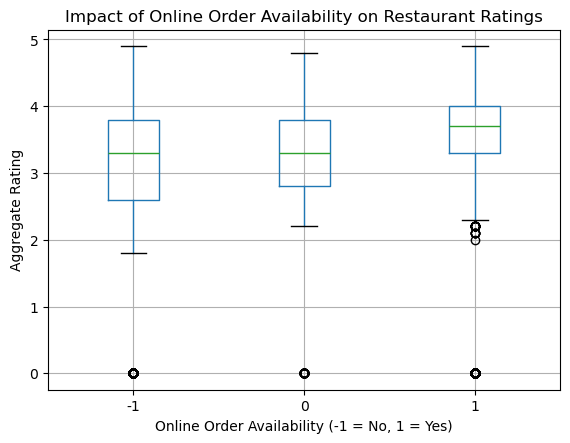

In [45]:
plt.figure(figsize=(8,5))
df_clean.boxplot(column='aggregate_rating', by='delivery')
plt.xlabel("Online Order Availability (-1 = No, 1 = Yes)")
plt.ylabel("Aggregate Rating")
plt.title("Impact of Online Order Availability on Restaurant Ratings")
plt.suptitle("")
plt.show()

In [46]:
correlation = df_clean['delivery'].corr(df_clean['aggregate_rating'])
print("Correlation:", correlation)

Correlation: 0.23748172769610362


The analysis indicates that restaurants offering online ordering (coded as 1) generally receive higher and more consistent ratings compared to those without online ordering (coded as -1). This suggests that convenience and accessibility provided by online ordering positively influence customer satisfaction.

In [47]:
# Drop missing values
df_clean = df.dropna(subset=['opentable_support'])

# Count restaurants
table_booking_counts = df_clean['opentable_support'].value_counts()

print("Distribution of Table Booking Availability:")
print(table_booking_counts)

Distribution of Table Booking Availability:
opentable_support
0.0    55086
Name: count, dtype: int64


In [48]:
percentage_distribution = (
    table_booking_counts / table_booking_counts.sum() * 100
)

print("\nPercentage Distribution:")
print(percentage_distribution)


Percentage Distribution:
opentable_support
0.0    100.0
Name: count, dtype: float64


In [49]:
# Count number of outlets per restaurant name
chain_counts = df['name'].value_counts()

# Select top 10 chains
top_chains = chain_counts.head(10)

print("Top 10 Restaurant Chains by Number of Outlets:")
print(top_chains)

Top 10 Restaurant Chains by Number of Outlets:
name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                203
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64


In [50]:
plt.figure()
plt.bar(top_chains["name"], top_chains["outlet_count"])
plt.xticks(rotation=90)
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()

KeyError: 'name'

<Figure size 640x480 with 0 Axes>

Insight:
Dominos is the moost popular outlet.

In [51]:
avg_ratings = (
    df[df["name"].isin(top_chains["name"])]
    .groupby("name")["aggregate_rating"]
    .mean()
    .reset_index()
    .sort_values(by="aggregate_rating", ascending=False)
)

print(avg_ratings)

KeyError: 'name'

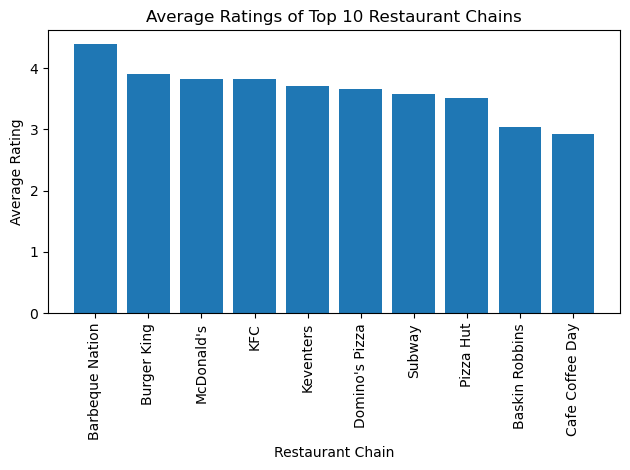

In [41]:
plt.figure()
plt.bar(avg_ratings["name"], avg_ratings["aggregate_rating"])
plt.xticks(rotation=90)
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Average Ratings of Top 10 Restaurant Chains")
plt.tight_layout()
plt.show()

Insights:
Barbeque Nation has the best rating among the food chains.

In [52]:
df["WiFi"] = df["highlights"].str.contains("Wifi", case=False, na=False)
df["Alcohol"] = df["highlights"].str.contains("Alcohol", case=False, na=False)
df["Outdoor_Seating"] = df["highlights"].str.contains("Outdoor Seating", case=False, na=False)
df["Live_Music"] = df["highlights"].str.contains("Live Music", case=False, na=False)

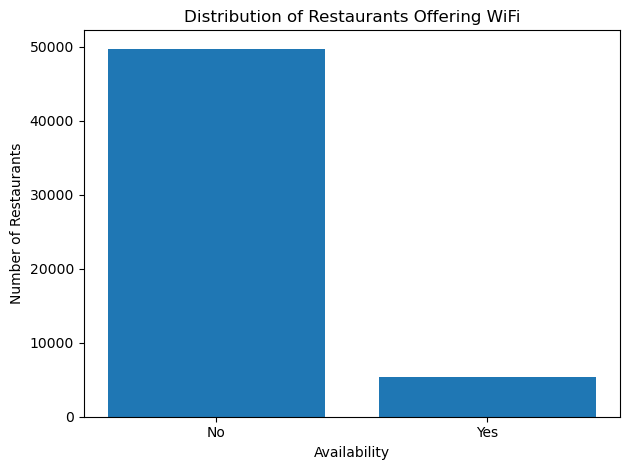

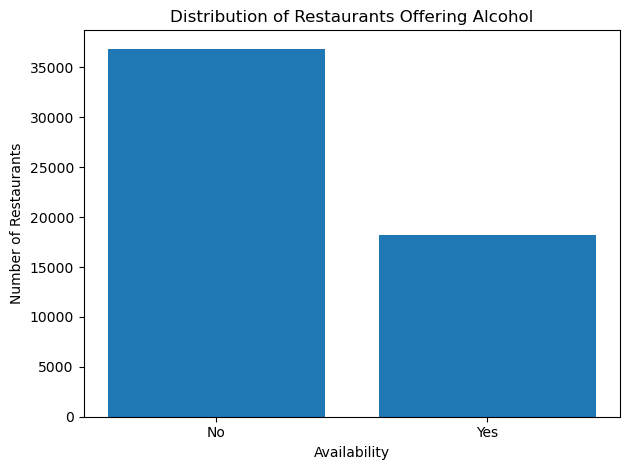

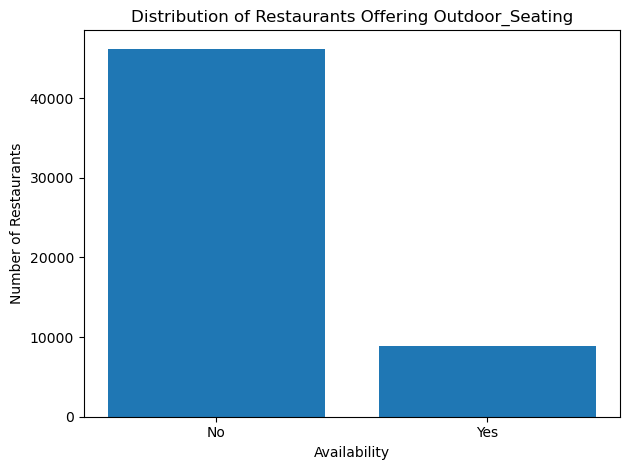

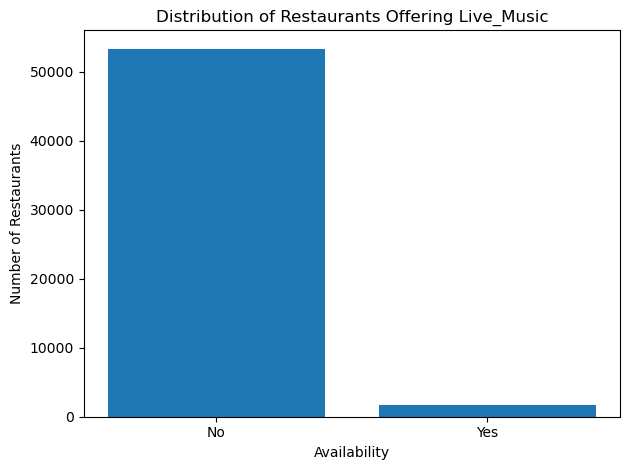

In [53]:
features = ["WiFi", "Alcohol", "Outdoor_Seating", "Live_Music"]

for feature in features:
    counts = df[feature].value_counts()

    plt.figure()
    plt.bar(["No", "Yes"], counts.values)
    plt.title(f"Distribution of Restaurants Offering {feature}")
    plt.xlabel("Availability")
    plt.ylabel("Number of Restaurants")
    plt.tight_layout()
    plt.show()

In [54]:
feature_summary = pd.DataFrame({
    "Feature": ["Wi-Fi", "Alcohol", "Outdoor Seating", "Live Music"],
    "Restaurants_With_Feature": [
        df["WiFi"].sum(),
        df["Alcohol"].sum(),
        df["Outdoor_Seating"].sum(),
        df["Live_Music"].sum()
    ]
})

print(feature_summary)

           Feature  Restaurants_With_Feature
0            Wi-Fi                      5351
1          Alcohol                     18223
2  Outdoor Seating                      8882
3       Live Music                      1731


In [55]:
features = ["WiFi", "Alcohol", "Outdoor_Seating", "Live_Music"]

rating_comparison = []

for feature in features:
    with_feature = df[df[feature]]["aggregate_rating"].mean()
    without_feature = df[~df[feature]]["aggregate_rating"].mean()

    rating_comparison.append({
        "Feature": feature,
        "Rating_With_Feature": round(with_feature, 2),
        "Rating_Without_Feature": round(without_feature, 2),
        "Rating_Difference": round(with_feature - without_feature, 2)
    })

rating_df = pd.DataFrame(rating_comparison)
print(rating_df)

           Feature  Rating_With_Feature  Rating_Without_Feature  \
0             WiFi                 3.72                    2.90   
1          Alcohol                 3.32                    2.81   
2  Outdoor_Seating                 3.27                    2.92   
3       Live_Music                 3.80                    2.95   

   Rating_Difference  
0               0.82  
1               0.50  
2               0.34  
3               0.85  


In [56]:
positive_reviews = df[df["rating_text"].isin(["Excellent", "Very Good", "Good"])]
negative_reviews = df[df["rating_text"].isin(["Average", "Poor", "Not rated"])]

In [57]:
positive = df[df["rating_text"].isin(["Excellent", "Very Good", "Good"])]
negative = df[df["rating_text"].isin(["Average", "Poor", "Not rated"])]
pos_counts = positive["rating_text"].value_counts()
neg_counts = negative["rating_text"].value_counts()

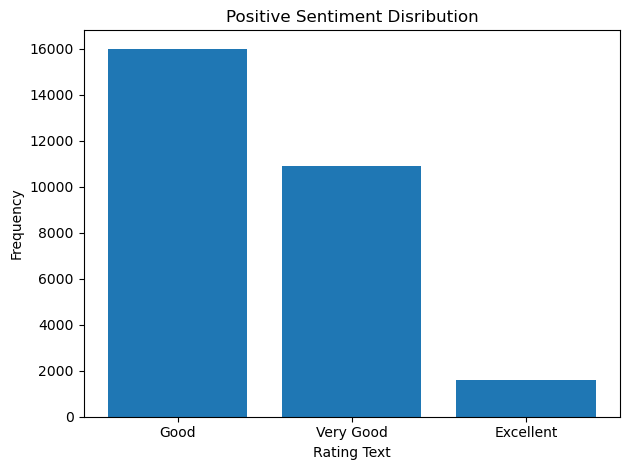

In [58]:
plt.figure()
plt.bar(pos_counts.index, pos_counts.values)
plt.title("Positive Sentiment Disribution")
plt.xlabel("Rating Text")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

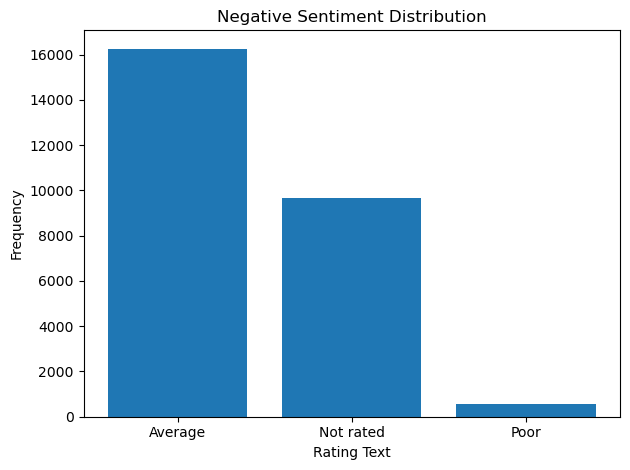

In [59]:
plt.figure()
plt.bar(neg_counts.index, neg_counts.values)
plt.title("Negative Sentiment Distribution")
plt.xlabel("Rating Text")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [60]:
sentiment_map = {
    "Excellent": "Positive",
    "Very Good": "Positive",
    "Good": "Positive",
    "Average": "Neutral",
    "Poor": "Negative",
    "Not rated": "Negative"
}

df["sentiment"] = df["rating_text"].map(sentiment_map)

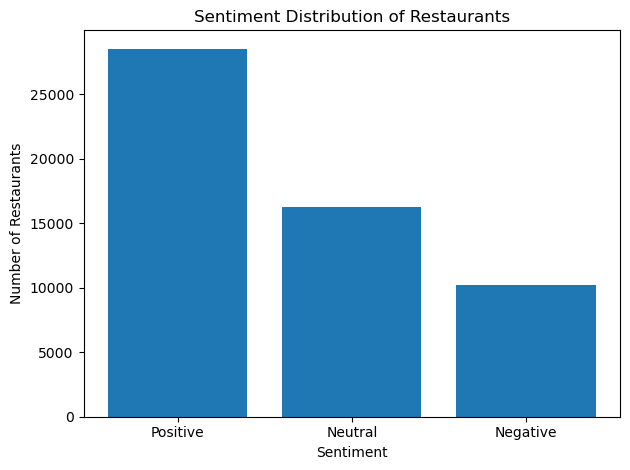

In [61]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution of Restaurants")
plt.xlabel("Sentiment")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

Insights:
Most of the restaurents have a positive review by the customer.

In [62]:
df["cuisines"] = df["cuisines"].astype(str)
cuisine_words = (
    df["cuisines"]
    .dropna()
    .str.lower()
    .str.split(",")
)

all_words = [word for sublist in cuisine_words for word in sublist]

In [63]:
df = df[df["cuisines"].notna()]
df["cuisines"] = df["cuisines"].astype(str)


In [64]:
noise_words = ["nan", "none", ""]

filtered_words = [w for w in all_words if w not in noise_words]

In [65]:
top_words = Counter(filtered_words).most_common(15)
print(top_words)

[("['north indian'", 8591), (" 'chinese'", 5359), (" 'fast food']", 5165), (" 'chinese']", 4537), ("['north indian']", 4295), (" 'north indian'", 3810), (" 'beverages']", 3326), (" 'desserts']", 2797), (" 'fast food'", 2576), (" 'north indian']", 2530), (" 'continental'", 2268), ("['fast food'", 2222), ("['chinese'", 2221), ("['bakery'", 2207), ("['cafe'", 2112)]


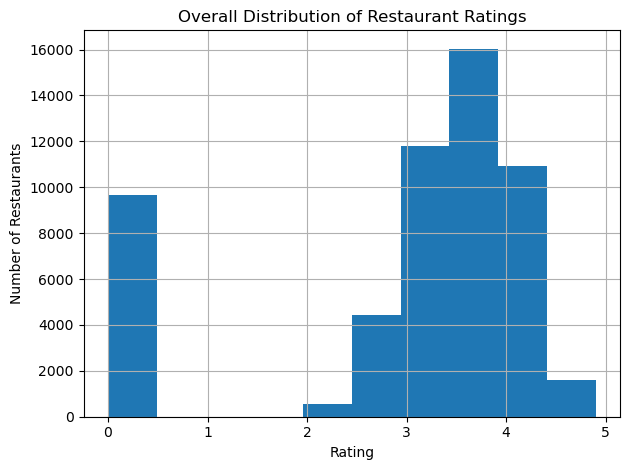

In [66]:
plt.figure()
df["aggregate_rating"].hist(bins=10)
plt.title("Overall Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

Insights: Most of the restaurent have rating between 3.5-4.

In [67]:
df.to_csv('Zomato_clean_data.csv', index=False)
